In [1]:
%matplotlib inline


# Comparison of the K-Means and MiniBatchKMeans clustering algorithms


We want to compare the performance of the MiniBatchKMeans and KMeans:
the MiniBatchKMeans is faster, but gives slightly different results (see
`mini_batch_kmeans`).

We will cluster a set of data, first with KMeans and then with
MiniBatchKMeans, and plot the results.
We will also plot the points that are labelled differently between the two
algorithms.



Automatically created module for IPython interactive environment


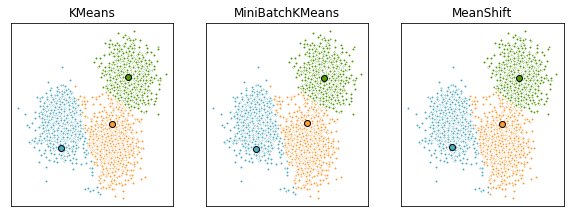

In [8]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans, MeanShift
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[2, 1], [-2, -1], [1, -2]]
n_clusters = len(centers)
n_clusters = 3
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

##########################################
# Compute clustering with MiniBatchKMeans

meanshift = MeanShift()
t0 = time.time()
meanshift.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
meanshift_cluster_centers = np.sort(meanshift.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
meanshift_labels = pairwise_distances_argmin(X, meanshift_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
# plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' % (t_mini_batch, mbk.inertia_))

# Meanshift
ax = fig.add_subplot(1, 3, 3)
for k, col in zip(range(len(meanshift_cluster_centers)), colors):
    my_members = meanshift_labels == order[k]
    cluster_center = meanshift_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MeanShift')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' % (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
# ax = fig.add_subplot(1, 3, 3)
# for k, col in zip(range(n_clusters), colors):
#     my_members = meanshift_labels == order[k]
#     cluster_center = meanshift_cluster_centers[order[k]]
#     ax.plot(X[my_members, 0], X[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
#     ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=6)
# ax.set_title('MiniBatchKMeans')
# ax.set_xticks(())
# ax.set_yticks(())

plt.show()

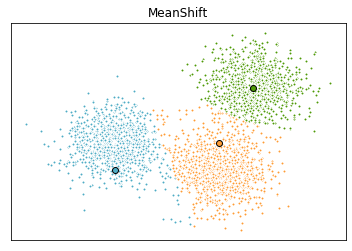

In [16]:

fig = plt.figure()
ax = fig.add_subplot()
for k, col in zip(range(len(meanshift_cluster_centers)), colors):
    my_members = meanshift_labels == order[k]
    cluster_center = meanshift_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MeanShift')
ax.set_xticks(())
ax.set_yticks(())
plt.show()